In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_folder = '/group/ag_compstatphys/data/tolga/simulation'

obstacle file: crystalline_walls_W15_rho0.8.h5

thermalization: slit_pore__equilibration_D15_rho0.7_T1.00_20251014_224116.h5

production: slit_pore__production_D15_rho0.7_T1.00_20251014_224829.h5


In [3]:
def sample_observables(file_name):

    file_path = f'{data_folder}/{file_name}'

    observables = {}
    num_regions = 0

    with h5py.File(file_path, 'r') as sim_data:
        region_list = list(sim_data['thermo'].keys())
        num_regions = len(region_list)

        # Calculate time averaged stress tensor
        tensor_sampling = np.zeros((num_regions,6))
        for i in range(1, num_regions):
            dataset_path = f'thermo/slab_{i}/stress_tensor/value'
            dataset = sim_data[dataset_path]
            for cur_data in dataset:            
                tensor_sampling[i] += cur_data[0:6]
        tensor_sampling = tensor_sampling/((len(dataset)))
        observables['slab_stress_tensor'] = tensor_sampling


        # Calculate time averaged density 
        density_sampling = np.zeros(num_regions)
        for i in range(1, num_regions):
            dataset_path = f'thermo/slab_{i}/density/value'
            cur_data = sim_data[dataset_path]
            cur_data = (np.array(cur_data))
            print(cur_data)    
            density_sampling[i] += np.mean(cur_data)
        
        observables['slab_density'] = density_sampling

        stress_tensor = sim_data['observables/stress_tensor/value']
        stress_tensor = np.array(stress_tensor)
        observables['stress_tensor'] = np.mean(stress_tensor, axis = 0)    

        pressure = sim_data['observables/pressure/value']
        pressure = np.array(pressure)
        observables['pressure'] = np.mean(pressure)   

        return observables

In [4]:
observables = sample_observables("slit_pore__production_D15_rho0.7_T1.00_20251015_143622.h5")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


In [67]:
observables["slab_density"]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.5000e-04,
       3.7000e-03, 7.4355e-01, 6.5705e-01, 8.6405e-01, 6.3830e-01,
       8.1145e-01, 6.9050e-01, 7.6390e-01, 7.2205e-01, 7.4385e-01,
       7.2510e-01, 7.4180e-01, 7.2080e-01, 7.2405e-01, 7.2125e-01,
       7.1090e-01, 7.1285e-01, 7.0155e-01, 7.0340e-01, 6.8985e-01,
       6.9050e-01, 6.6980e-01, 6.6930e-01, 6.4200e-01, 6.4790e-01,
       5.9885e-01, 6.4775e-01, 5.2800e-01, 7.2250e-01, 3.8025e-01,
       1.0029e+00, 6.1500e-03, 3.6000e-03, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [39]:
observables["slab_density"]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.89603960e-04, 3.69158416e-03,
       7.00252475e-01, 6.81927723e-01, 8.15950495e-01, 6.49434158e-01,
       7.77360891e-01, 6.82608911e-01, 7.45134653e-01, 7.01663861e-01,
       7.27515347e-01, 7.07860396e-01, 7.17125248e-01, 7.07421782e-01,
       7.08486139e-01, 7.03078713e-01, 7.00764356e-01, 6.96388614e-01,
       6.92258416e-01, 6.88458911e-01, 6.81925743e-01, 6.79013366e-01,
       6.67778218e-01, 6.71855941e-01, 6.49068317e-01, 6.72240594e-01,
       6.19376238e-01, 6.96152475e-01, 5.57048020e-01, 8.02484653e-01,
       3.99441089e-01, 1.08396931e+00, 8.03861386e-03, 3.64405941e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

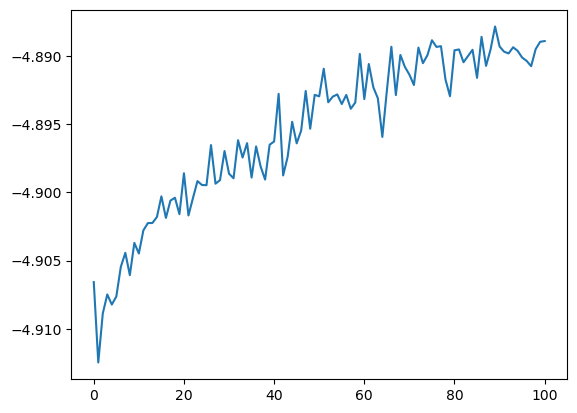

In [26]:
file_path = f'{data_folder}/{"slit_pore__production_D15_rho0.7_T1.00_20251014_235800.h5"}'
with h5py.File(file_path, 'r') as sim_data:
    potential_energy = np.array(sim_data['observables/potential_energy/value'])
    plt.plot(potential_energy)

Density profile obtained from individual slabs

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


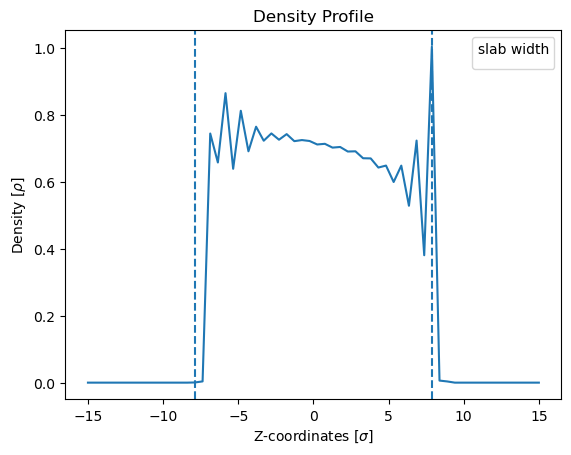

In [68]:

y = observables['slab_density']
x = np.linspace(-15, 15 , y.shape[0])

plt.plot(x,y,)
    

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Density Profile")
plt.xlabel(r'Z-coordinates $[\sigma]$')
plt.ylabel(r"Density $[\rho]$")


plt.legend(title = 'slab width')
plt.show()


non-normalized local surface density

$$ \gamma^* = \sigma_\parallel - \sigma_\perp  $$
$$ \gamma^* = \frac{1}{2} (\sigma_{xx} + \sigma_{yy}) - \sigma_{zz} 

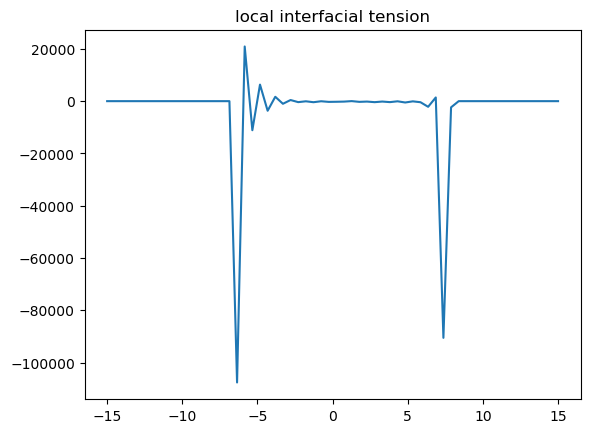

In [13]:
s = []
for i in range(3):
    s.append(observables["slab_stress_tensor"][:,i])

lst = 0.5*(s[0] + s[1]) - s[2]

plt.title("local interfacial tension")
plt.plot(x, lst)

In [14]:
area = 100*100
surface_tension = 0.5 * np.sum(lst)/area
print(f'surface tension per interface: {surface_tension:.3f}') 

surface tension per interface: -9.583


In [15]:
def read_wavevectors(file_name):

    file_path = f'{data_folder}/{file_name}'

    with h5py.File(file_path, 'r') as sim_data:

        # Read wavevectors
        wavenumber_slab_parallel = np.array(sim_data['ssf/slab_1/parallel/wavenumber']).tolist()
        wavenumber_slab_perpendicular = np.array(sim_data['ssf/slab_1/perpendicular/wavenumber']).tolist()

        wavenumber_global_parallel = np.array(sim_data['ssf/global_parallel/wavenumber']).tolist()
        wavenumber_global_perpendicular = np.array(sim_data['ssf/global_perpendicular/wavenumber']).tolist()

    return [wavenumber_slab_parallel, wavenumber_slab_perpendicular], [wavenumber_global_parallel, wavenumber_global_perpendicular]



def read_ssf(file_name):

    file_path = f'{data_folder}/{file_name}'
    num_regions = 0

    wavenumber_slab, wavenumber_global = read_wavevectors(file_name)


    with h5py.File(file_path, 'r') as sim_data:
        region_list = list(sim_data['ssf'].keys())
        num_regions = len(region_list)


        # Calculate time averaged static structure factor
        ssf_parallel = np.zeros((num_regions, len(wavenumber_slab[0]), 3))
        ssf_perpendicular = np.zeros((num_regions, len(wavenumber_slab[1]), 3))

        for i in range(1, num_regions - 1):
            dataset_parallel_path = f'ssf/slab_{i}/parallel/value'
            dataset_perpendicular_path = f'ssf/slab_{i}/perpendicular/value'

            ssf_parallel_cur = np.array(sim_data[dataset_parallel_path])
            ssf_perpendicular_cur = np.array(sim_data[dataset_perpendicular_path])

            ssf_parallel[i] = np.average(ssf_parallel_cur, axis = 0)
            ssf_perpendicular[i] = np.average(ssf_perpendicular_cur, axis = 0)



        # Calculate time averaged static structure along simulation box
        ssf_parallel_global = np.zeros((len(wavenumber_global[0]), 3))
        ssf_perpendicular_global = np.zeros((len(wavenumber_global[1]), 3))

        dataset_path = f'ssf/global_parallel/value'
        dataset = sim_data[dataset_path]
        ssf_parallel_global = np.average(np.array(dataset), axis = 0)

        dataset_path = f'ssf/global_perpendicular/value'
        dataset = sim_data[dataset_path]
        ssf_perpendicular_global = np.average(np.array(dataset), axis = 0)
        

        return ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global
    


In [16]:
file_name = "slit_pore__production_D15_rho0.7_T1.00_20251014_232118.h5"

In [17]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf(file_name)
wavenumber_slab, wavenumber_global = read_wavevectors(file_name)

In [18]:
ssf_parallel_global.shape

(477, 3)

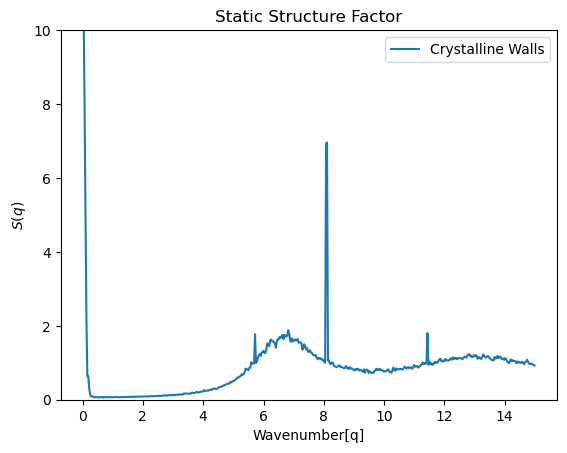

In [19]:

x = wavenumber_global[0]
y = ssf_parallel_global[:, 0]


plt.plot(x, y, label = "Crystalline Walls")

plt.ylim((0,10))

plt.title("Static Structure Factor")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber[q]")
#plt.xscale("log")
plt.legend()
plt.show()

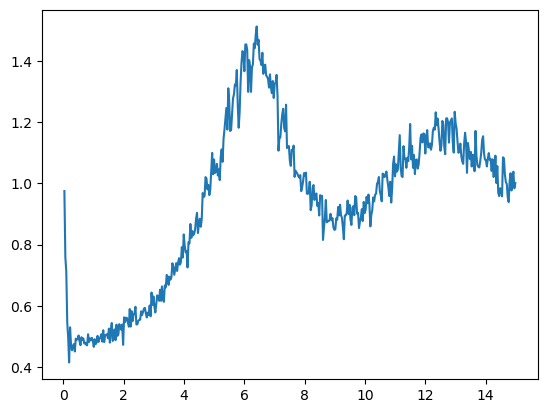

In [20]:
x = wavenumber_slab[0]
y = ssf_parallel[30,:,0] #middle slab

#plt.xscale('log')
plt.plot(x, y)

In [25]:


file_path = f'{data_folder}/{file_name}'
num_regions = 0

particle_num_list = []

with h5py.File(file_path, 'r') as sim_data:
    region_list = list(sim_data['thermo'].keys())
    num_regions = len(region_list)

    for i in range(1, num_regions - 1):
        db_path = f'thermo/slab_{i}/particle_number/value'
        particle_num_list.append(np.average(sim_data[db_path], axis=0))


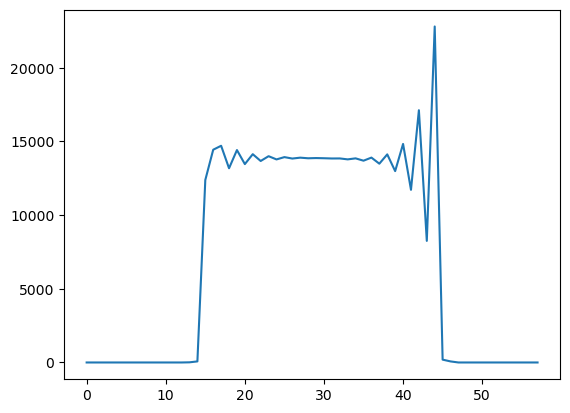

In [27]:
plt.plot(particle_num_list)

In [28]:
"[17-08-2025 18:32:34.306328] region (region-z13): lowest corner: -50 -50 -7.14"
"[17-08-2025 18:32:34.306336] region (region-z13): edge length: 100 100 0.113333"


with h5py.File(f'{data_folder}/{file_name}', 'r') as f:
    pos_fluid = f['/particles/fluid/position/value'][0]
    pos_obst = f['/particles/obstacles/position/value'][0]



species_fluid = ['F'] * pos_fluid.shape[0]
species_obst = ['O'] * pos_obst.shape[0]


all_positions = np.vstack((pos_fluid, pos_obst))
all_species = species_fluid + species_obst
n_atoms = all_positions.shape[0]

pos_list = np.empty(3)

for atom, pos in zip(all_species, all_positions):
    if atom == "F" and pos[2] > -7.14  and pos[2] < -7.02667:
        pos_list = np.vstack((pos_list, pos))



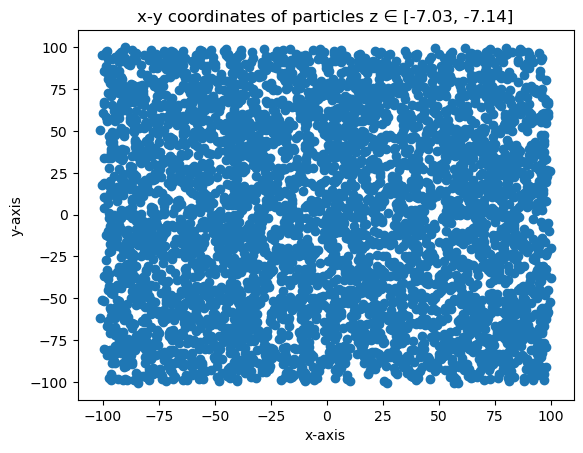

In [29]:
plt.scatter(pos_list[:,0], pos_list[:,1])

plt.xlabel("x-axis")
plt.ylabel("y-axis")


plt.title("x-y coordinates of particles z ∈ [-7.03, -7.14]")

plt.show()

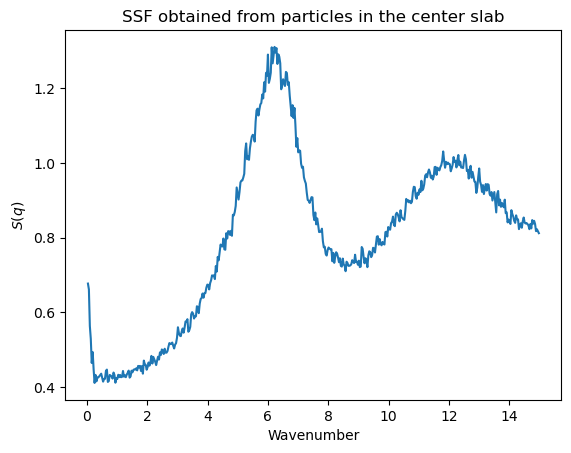

In [32]:
x = wavenumber_slab[0]
y = ssf_parallel[30,:,0] #middle slab

plt.title("SSF obtained from particles in the center slab")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber")


#plt.xscale('log')
plt.plot(x, y)
plt.show()

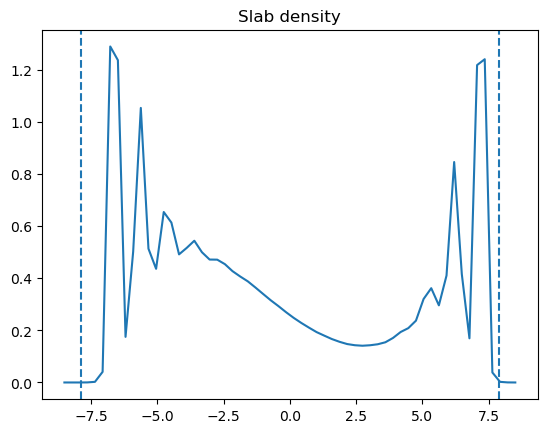

In [24]:
obs = sample_observables("slit_025_lp.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


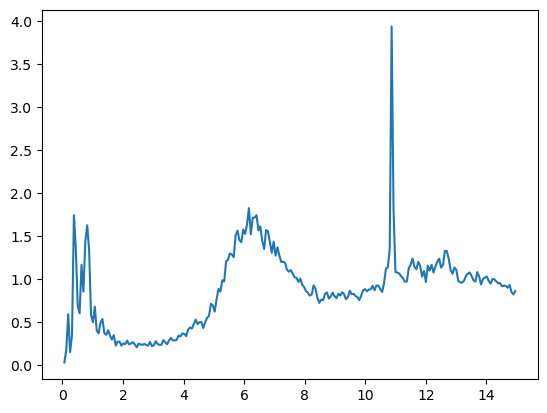

In [25]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf("slit_025_lp2.h5")
wavenumber_slab, wavenumber_global = read_wavevectors("slit_025_lp2.h5")

plt.plot(wavenumber_global[0], ssf_parallel_global[:,0])
#plt.xscale("log")
plt.show()

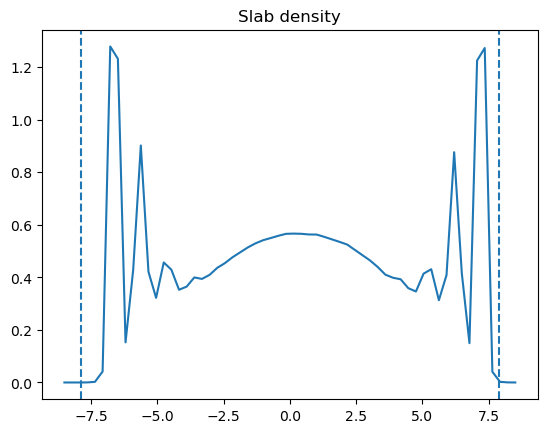

In [26]:
obs = sample_observables("slit_025_lp2.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


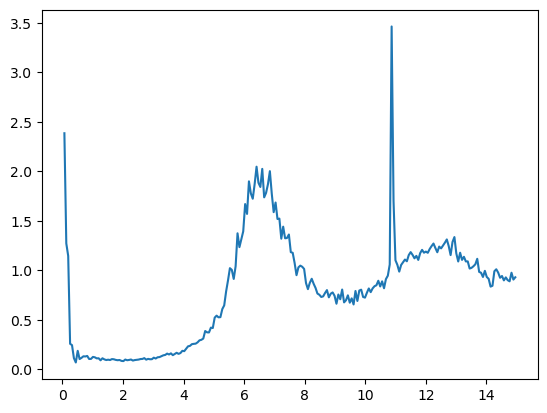

In [27]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf("slit_025_lp3.h5")
wavenumber_slab, wavenumber_global = read_wavevectors("slit_025_lp3.h5")

plt.plot(wavenumber_global[0], ssf_parallel_global[:,0])
#plt.xscale("log")
plt.show()

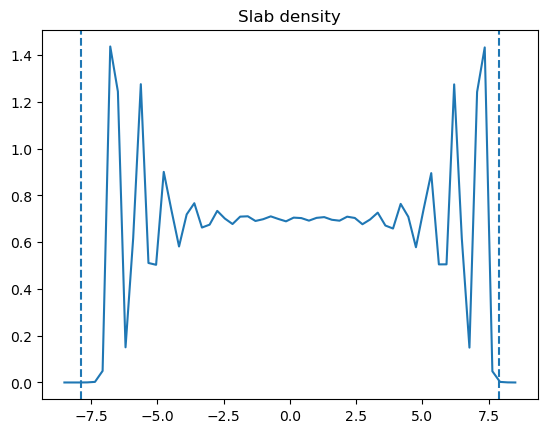

In [28]:
obs = sample_observables("slit_025_lp3.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


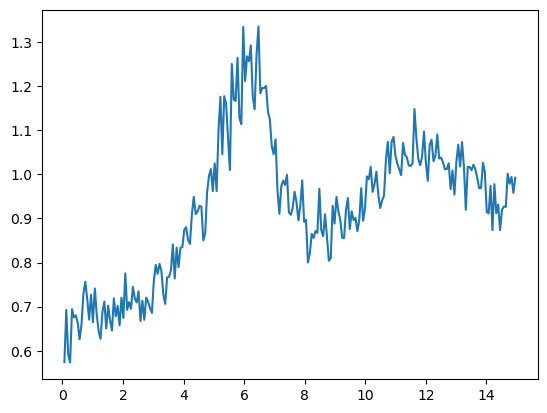

In [29]:
x = wavenumber_slab[0]
y = ssf_parallel[30,:,0] #middle slab

#plt.xscale('log')
plt.plot(x, y)

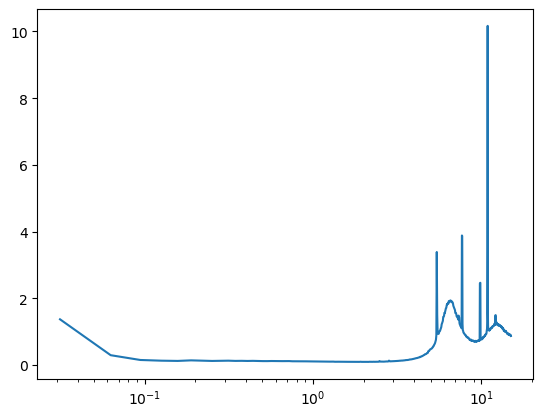

In [32]:
ssf_parallel, ssf_perpendicular, ssf_parallel_global, ssf_perpendicular_global = read_ssf("slit_1s_NVE.h5")
wavenumber_slab, wavenumber_global = read_wavevectors("slit_1s_NVE.h5")

plt.plot(wavenumber_global[0], ssf_parallel_global[:,0])
plt.xscale("log")
plt.show()

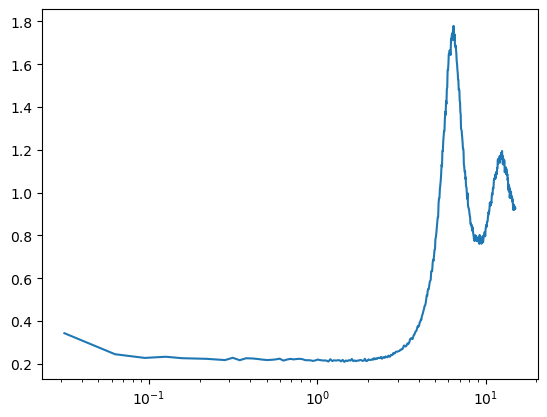

In [34]:
x = wavenumber_slab[0]
y = ssf_parallel[6,:,0] #middle slab

plt.xscale('log')
plt.plot(x, y)

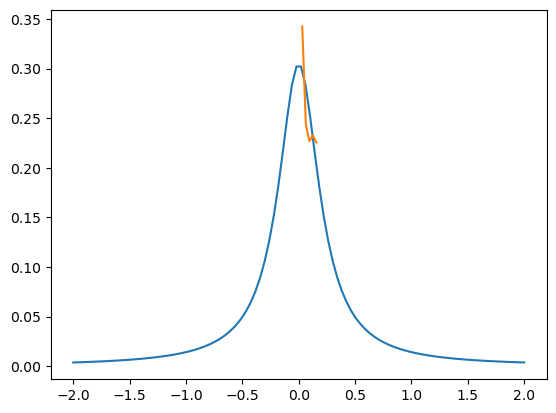

In [38]:
from scipy.optimize import curve_fit

x = x[:10]
y = y[:10]

popt, pcov = curve_fit(lorentzian, x, y)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, lorentzian(xx, popt[0], popt[1]))
plt.plot(x, y)


In [31]:
obs = sample_observables("slit_1s.h5")

y = obs['slab_density']
x = np.linspace(-8.5, 8.5, y.shape[0])

plt.axvline(-7.88, ls = '--')
plt.axvline(7.88, ls = '--')

plt.title("Slab density")

plt.plot(x,y)


BlockingIOError: [Errno 11] Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

In [ ]:



slit_1s_NVE.h5

In [43]:
ssf_parallel_NVE, ssf_perpendicular_NVE, ssf_parallel_global_NVE, ssf_perpendicular_global_NVE = read_ssf("slit_1s_NVE.h5")
wavenumber_slab_NVE, wavenumber_global_NVE = read_wavevectors("slit_1s_NVE.h5")


ssf_parallel_NVT, ssf_perpendicular_NVT, ssf_parallel_global_NVT, ssf_perpendicular_global_NVT = read_ssf("slit_1s.h5")
wavenumber_slab_NVT, wavenumber_global_NVT = read_wavevectors("slit_1s.h5")


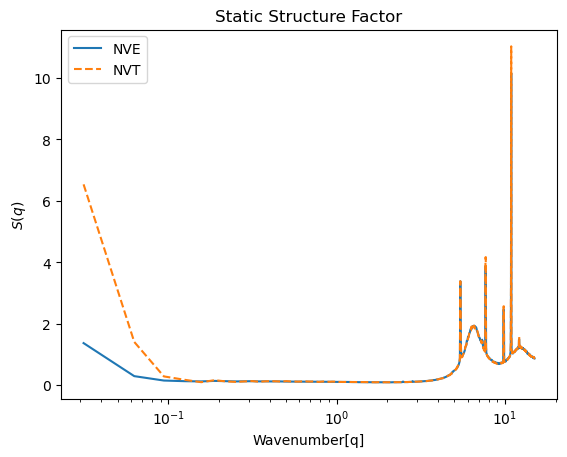

In [47]:
plt.plot(wavenumber_global_NVE[0], ssf_parallel_global_NVE[:,0], label = "NVE")

plt.plot(wavenumber_global_NVT[0], ssf_parallel_global_NVT[:,0], label = "NVT", ls = '--')

plt.title("Static Structure Factor")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber[q]")
plt.xscale("log")
plt.legend()
plt.show()

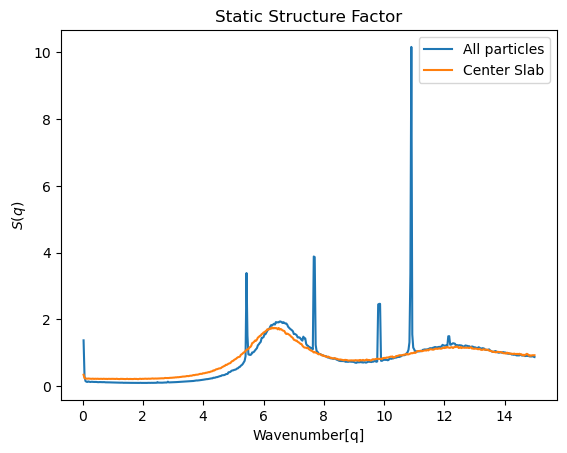

In [51]:
plt.plot(wavenumber_global_NVE[0], ssf_parallel_global_NVE[:,0], label = "All particles")

x = wavenumber_slab_NVE[0]
y = ssf_parallel_NVE[7,:,0] #middle slab

plt.plot(x, y, label = 'Center Slab')

plt.title("Static Structure Factor")
plt.ylabel(r"$S(q)$")
plt.xlabel(r"Wavenumber[q]")
#plt.xscale("log")
plt.legend()
plt.show()